In [1]:
#Dataset used
#https://www.kaggle.com/datasets/naveengill/cicids2017-dataset/data

In [ ]:
from google.colab import files
files.upload() #if you are accesing directly from kaggle give kaggle key here

In [3]:
import os
os.makedirs("/root/.kaggle/", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download naveengill/cicids2017-dataset
!unzip cicids2017-dataset.zip -d cicids2017

Dataset URL: https://www.kaggle.com/datasets/naveengill/cicids2017-dataset
License(s): other
cicids2017-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cicids2017-dataset.zip
replace cicids2017/CICIDS2017/CICIDS2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cicids2017/CICIDS2017/CICIDS2017.csv  y
u



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/cicids2017/CICIDS2017/CICIDS2017.csv")

<ipython-input-2-2f5bccb0d105>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/cicids2017/CICIDS2017/CICIDS2017.csv")


In [7]:
# Taking 50% of the entire dataset randomly coz i have tested it is giving RAM out
df = df.sample(frac=0.5, random_state=42).reset_index(drop=True)

print(df[' Label'].value_counts())

 Label
BENIGN              836506
DoS Hulk            115628
PortScan             79433
DDoS                 63938
DoS GoldenEye         5065
DoS slowloris         2873
DoS Slowhttptest      2787
Bot                    980
Infiltration            16
Heartbleed               7
Name: count, dtype: int64


In [8]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,23,48.0,2.0,0.0,4.0,0.0,2.0,2.0,2.000,0.000000,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,443,5154430.0,8.0,5.0,367.0,3710.0,210.0,0.0,45.875,79.373327,...,32.0,124732.0,0.0,124732.0,124732.0,5029695.0,0.0,5029695.0,5029695.0,BENIGN
2,53,274985.0,2.0,2.0,72.0,154.0,36.0,36.0,36.000,0.000000,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,1322,22.0,1.0,1.0,2.0,6.0,2.0,2.0,2.000,0.000000,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan
4,443,7686703.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [9]:
df.shape

(1107234, 79)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107234 entries, 0 to 1107233
Data columns (total 79 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Destination Port             1107234 non-null  object 
 1    Flow Duration                1107233 non-null  float64
 2    Total Fwd Packets            1107233 non-null  float64
 3    Total Backward Packets       1107233 non-null  float64
 4   Total Length of Fwd Packets   1107233 non-null  float64
 5    Total Length of Bwd Packets  1107233 non-null  float64
 6    Fwd Packet Length Max        1107233 non-null  float64
 7    Fwd Packet Length Min        1107233 non-null  float64
 8    Fwd Packet Length Mean       1107233 non-null  float64
 9    Fwd Packet Length Std        1107233 non-null  float64
 10  Bwd Packet Length Max         1107233 non-null  float64
 11   Bwd Packet Length Min        1107233 non-null  float64
 12   Bwd Packet Length Mean     

In [11]:
#insights->2 columns are object data type 1.Destination port 2.Label or target columns..

In [12]:
print(df.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [13]:
#insights->There are 79 Columns in It one problem is that columns name has leading space beafore it names

In [14]:
#solving that
for cols in df.columns:
  df.rename(columns={cols:cols.strip()},inplace=True)

In [15]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [16]:
df.sample(1)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
360526,80,98619095.0,8.0,7.0,330.0,11595.0,330.0,0.0,41.25,116.672619,...,32.0,985.0,0.0,985.0,985.0,98500000.0,0.0,98500000.0,98500000.0,DoS Hulk


In [17]:
#Checking for duplicated value
df.duplicated().sum()

np.int64(108291)

In [18]:
#insights->there are 271280 duplicate values
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(998943, 79)

In [20]:
#Cheking for NULL Values
df.isnull().sum()

,0
Destination Port,0
Flow Duration,1
Total Fwd Packets,1
Total Backward Packets,1
Total Length of Fwd Packets,1
...,...
Idle Mean,1
Idle Std,1
Idle Max,1
Idle Min,1


In [21]:
#seeing all colms
print(df.isnull().sum().to_string())


Destination Port                0
Flow Duration                   1
Total Fwd Packets               1
Total Backward Packets          1
Total Length of Fwd Packets     1
Total Length of Bwd Packets     1
Fwd Packet Length Max           1
Fwd Packet Length Min           1
Fwd Packet Length Mean          1
Fwd Packet Length Std           1
Bwd Packet Length Max           1
Bwd Packet Length Min           1
Bwd Packet Length Mean          1
Bwd Packet Length Std           1
Flow Bytes/s                   92
Flow Packets/s                  1
Flow IAT Mean                   1
Flow IAT Std                    1
Flow IAT Max                    1
Flow IAT Min                    1
Fwd IAT Total                   1
Fwd IAT Mean                    1
Fwd IAT Std                     1
Fwd IAT Max                     1
Fwd IAT Min                     1
Bwd IAT Total                   1
Bwd IAT Mean                    1
Bwd IAT Std                     1
Bwd IAT Max                     1
Bwd IAT Min   

In [22]:
#Insights->there are less than 1% missing vaues in it
#->so we can drop them
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [24]:
df.sample(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
373203,80,116285407.0,17.0,15.0,1064.0,2830.0,980.0,0.0,62.588235,236.419928,...,20.0,90560.45455,223534.076,764541.0,23024.0,9987178.636,70941.85316,10000000.0,9773855.0,BENIGN
239122,137,13150737.0,207.0,0.0,10350.0,0.0,50.0,50.0,50.000000,0.000000,...,20.0,0.00000,0.000,0.0,0.0,0.000,0.00000,0.0,0.0,BENIGN
229527,53,353.0,2.0,2.0,72.0,104.0,36.0,36.0,36.000000,0.000000,...,20.0,0.00000,0.000,0.0,0.0,0.000,0.00000,0.0,0.0,BENIGN


In [25]:
#Visualising our target column

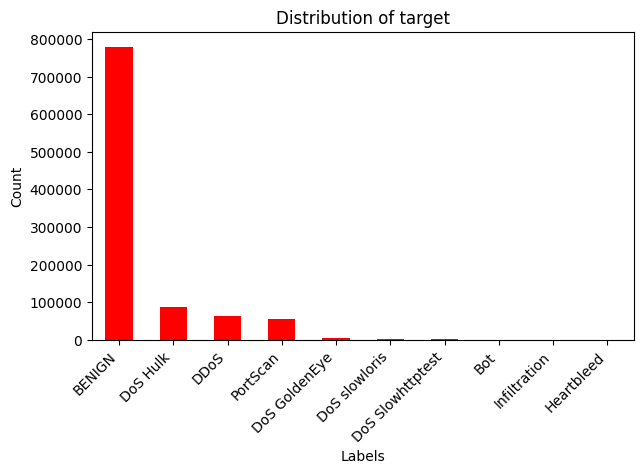

In [26]:
import matplotlib.pyplot as plt

label_counts = df['Label'].value_counts()

plt.figure(figsize=(7, 4))
label_counts.plot(kind='bar', color='red')

plt.title('Distribution of target')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [27]:
df['Label'].value_counts()

,count
Label,
BENIGN,779989
DoS Hulk,87241
DDoS,63938
PortScan,56266
DoS GoldenEye,5064
DoS slowloris,2703
DoS Slowhttptest,2653
Bot,974
Infiltration,16


In [28]:
#this dataset is highly imbalanced Normal is much more than melicios data...
#->later be fixed

In [29]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [30]:
#one column Destination Port was in object datatype

In [31]:
df['Destination Port'].dtype

dtype('O')

In [32]:
df['Destination Port']=df['Destination Port'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998851 entries, 0 to 1107233
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             998851 non-null  int64  
 1   Flow Duration                998851 non-null  float64
 2   Total Fwd Packets            998851 non-null  float64
 3   Total Backward Packets       998851 non-null  float64
 4   Total Length of Fwd Packets  998851 non-null  float64
 5   Total Length of Bwd Packets  998851 non-null  float64
 6   Fwd Packet Length Max        998851 non-null  float64
 7   Fwd Packet Length Min        998851 non-null  float64
 8   Fwd Packet Length Mean       998851 non-null  float64
 9   Fwd Packet Length Std        998851 non-null  float64
 10  Bwd Packet Length Max        998851 non-null  float64
 11  Bwd Packet Length Min        998851 non-null  float64
 12  Bwd Packet Length Mean       998851 non-null  float64
 13  Bwd

#Feature Selection..

In [34]:
corr_matrix=df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

"""commented it here coz it was taking too long to test but you can see while evaluating 👍"""

In [35]:
#Due to large no.of colms we cant visualize properly 😁 we will seeing it now by other way

In [36]:
#df.corr(numeric_only=True)

In [37]:
df['Fwd Header Length'].corr(df['Fwd Header Length.1'])

np.float64(1.0)

In [38]:
#thsse two are highly coreleted
df.drop(['Fwd Header Length.1'],axis=1,inplace=True)

In [39]:
#using domain knowlegde

In [40]:
#this Fwd PSH Flags — Rarely set, mostly zero.

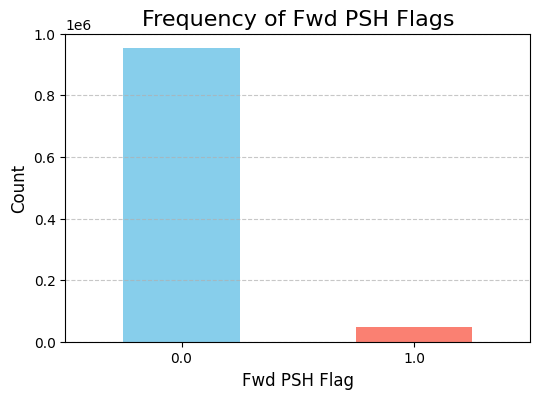

In [41]:
counts = df['Fwd PSH Flags'].value_counts()


plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Frequency of Fwd PSH Flags', fontsize=16)
plt.xlabel('Fwd PSH Flag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [42]:
#Bwd PSH Flags this is almost always zero

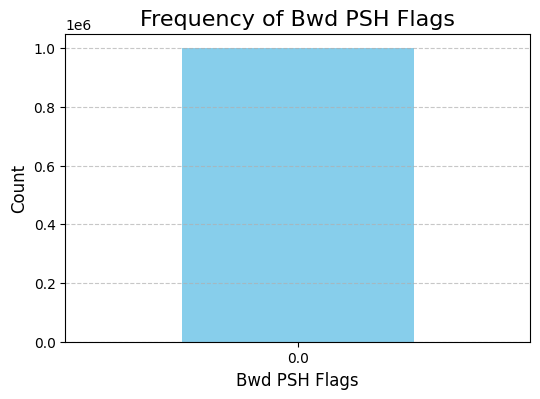

In [43]:

counts = df['Bwd PSH Flags'].value_counts()


plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Frequency of Bwd PSH Flags', fontsize=16)
plt.xlabel('Bwd PSH Flags', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [44]:
#Fwd PSH Flags — Rarely set, mostly zero.
df['Fwd URG Flags'].value_counts()

,count
Fwd URG Flags,
0.0,998793
1.0,58


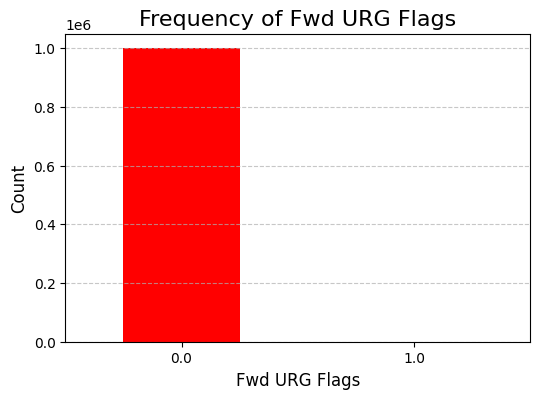

In [45]:
counts = df['Fwd URG Flags'].value_counts()

plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['red', 'salmon'])

plt.title('Frequency of Fwd URG Flags', fontsize=16)
plt.xlabel('Fwd URG Flags', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [46]:
#Bwd URG Flags — Almost always zero.

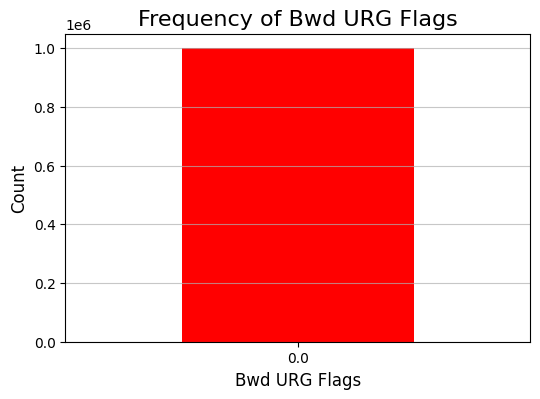

In [47]:

counts = df['Bwd URG Flags'].value_counts()

plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['red', 'salmon'])

plt.title('Frequency of Bwd URG Flags', fontsize=16)
plt.xlabel('Bwd URG Flags', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7)
plt.show()

In [48]:
#CWE Flag Count — Minimal or zero variance

In [49]:
df['CWE Flag Count'].value_counts()

,count
CWE Flag Count,
0.0,998793
1.0,58


In [50]:
#ECE Flag Count — Minimal or zero variance

In [51]:
df['ECE Flag Count'].value_counts()

,count
ECE Flag Count,
0.0,998601
1.0,250


In [52]:
#Highly Correlated / Redundant:

In [53]:
df['Avg Fwd Segment Size'].corr(df['Avg Bwd Segment Size'])

np.float64(-0.02468116593748491)

In [54]:
df['Max Packet Length'].corr(df['Min Packet Length'])

np.float64(-0.2883631500097906)

In [55]:
"""
'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate'

'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'
"""
#are mostly Zero

"\n'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate'\n\n'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate' \n"

In [56]:
df['Fwd Avg Bytes/Bulk'].value_counts()


,count
Fwd Avg Bytes/Bulk,
0.0,998851


In [57]:
"""
'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
    'URG Flag Count'
"""
#->Flags are generally Zero

"\n'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',\n    'URG Flag Count'\n"

In [58]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [59]:
df['Subflow Fwd Bytes'].corr(df['Total Length of Fwd Packets']) #highly corellated

np.float64(0.9999995605137747)

In [60]:
df['Subflow Bwd Bytes'].corr(df['Total Length of Bwd Packets']) #highly corellated

np.float64(0.9999998918806726)

In [61]:

columns_to_drop = [
    'Fwd PSH Flags', 'Bwd PSH Flags',
    'Fwd URG Flags', 'Bwd URG Flags',
    'CWE Flag Count', 'ECE Flag Count',
    'Bwd Packet Length Std','Fwd Avg Bytes/Bulk',
    'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
    'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
    'Bwd Avg Bulk Rate','FIN Flag Count',
    'SYN Flag Count', 'RST Flag Count',
    'PSH Flag Count','URG Flag Count',
    'Subflow Fwd Bytes','Subflow Bwd Bytes',
]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [62]:
df.shape

(998851, 58)

In [63]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,998851.000000,9.988510e+05,998851.000000,998851.000000,9.988510e+05,9.988510e+05,998851.000000,998851.000000,998851.000000,998851.000000,...,998851.000000,9.988510e+05,9.988510e+05,9.988510e+05,9.988510e+05,9.988510e+05,9.988510e+05,9.988510e+05,9.988510e+05,9.988510e+05
mean,8450.544233,1.751043e+07,9.398595,10.410717,6.146732e+02,1.602674e+04,240.091476,18.651860,66.205921,82.514197,...,6.396586,-6.459122e+02,9.269763e+04,4.394643e+04,1.661482e+05,6.721667e+04,1.075744e+07,6.623845e+05,1.125728e+07,1.024691e+07
std,18655.996486,3.592113e+07,760.124443,1013.630453,1.451699e+04,2.261583e+06,806.738856,65.757422,211.071152,322.665430,...,727.747021,2.373992e+05,6.886538e+05,4.280328e+05,1.075561e+06,6.066435e+05,2.688623e+07,5.331740e+06,2.770664e+07,2.662055e+07
min,0.000000,-1.200000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.388531e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.930000e+02,2.000000,1.000000,1.200000e+01,6.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,5.051800e+04,2.000000,2.000000,6.400000e+01,1.520000e+02,38.000000,2.000000,35.454545,0.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,5.558322e+06,6.000000,5.000000,3.340000e+02,1.781000e+03,215.000000,35.000000,52.000000,77.432805,...,3.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65535.000000,1.200000e+08,217797.000000,289585.000000,1.290000e+07,6.396506e+08,24820.000000,2325.000000,5675.444444,6692.644993,...,207409.000000,1.260000e+02,1.016597e+08,7.420000e+07,1.050000e+08,1.016597e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [64]:
#working on our target column
df['Label'].value_counts()

,count
Label,
BENIGN,779989
DoS Hulk,87241
DDoS,63938
PortScan,56266
DoS GoldenEye,5064
DoS slowloris,2703
DoS Slowhttptest,2653
Bot,974
Infiltration,16


In [65]:
#seeeing for inf value
#np.isinf(df).sum().sum()

In [66]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [67]:
df.isna().sum().sum()

np.int64(1078)

In [68]:
df.dropna(inplace=True)

In [69]:
df.isna().sum().sum()

np.int64(0)

In [70]:
#encoding our LAbel class
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

In [71]:
df['Label'].value_counts()

,count
Label,
0,779522
4,87241
2,63938
9,56197
3,5064
6,2703
5,2653
1,971
8,16


**Modeling Part**

In [74]:
X=df.drop(['Label'],axis=1)
y=df['Label']

In [75]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def reduce_memory_usage(df):
    for col in df.select_dtypes(include=['float', 'int']).columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

"""
I am using reduce_memory_usage coz while applying SMOTE it was giving RAM out of Memory in My colab
"""


In [76]:

X_train = reduce_memory_usage(X_train)

sm = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' balances all minority classes
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [78]:
print(X_train.shape,y_train.shape)

(698818, 57) (698818,)


In [79]:
print(X_train_res.shape,y_train_res.shape)

(5459890, 57) (5459890,)


In [80]:
#scaling by robust scaler

In [81]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

#**Testing Diifrent Models**

In [86]:
import xgboost as xgb


xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


xgb_clf.fit(X_train_scaled, y_train_res)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:37:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

#**Evaluation of our Model**

In [88]:
y_pred = xgb_clf.predict(X_test_scaled)

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")


Accuracy: 99.65%
Precision: 99.81%
Recall: 99.65%
F1 Score: 99.71%


In [102]:
#testing for train and Test Accuracy
train_accuracy = xgb_clf.score(X_train_scaled, y_train_res)
test_accuracy = xgb_clf.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.93%
Test Accuracy: 99.65%


In [ ]:
#both training and test accuracy is good

In [98]:

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)



Confusion Matrix:
 [[232540    691     12     19    113     18      1      1      0    138]
 [     0    296      0      0      0      0      0      0      0      0]
 [     2      0  19419      0      0      0      0      0      0      0]
 [     0      0      0   1495      0      2      0      0      0      0]
 [     3      0      0     26  26076      1      4      0      0      2]
 [     0      0      0      1      0    797      2      0      0      1]
 [     2      0      0      1      0      1    830      0      0      0]
 [     0      0      0      0      0      0      0      1      0      0]
 [     1      0      0      0      0      0      0      0      2      0]
 [     5      0      0      0      1      1      0      0      0  16989]]


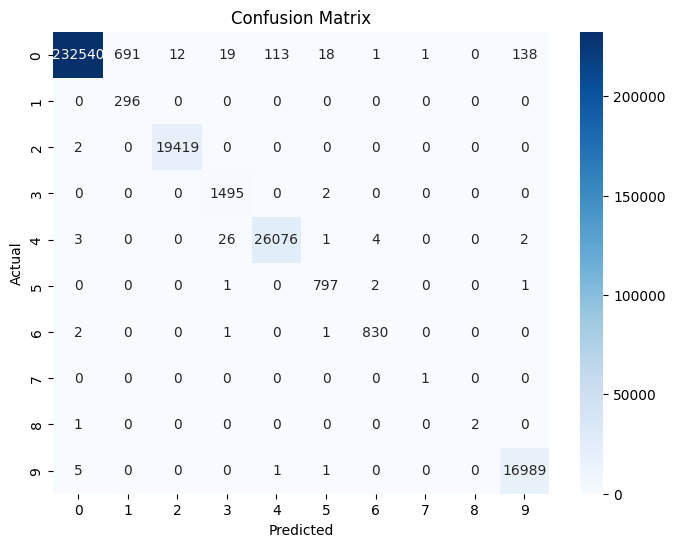

In [99]:
#visualising Confusion  Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

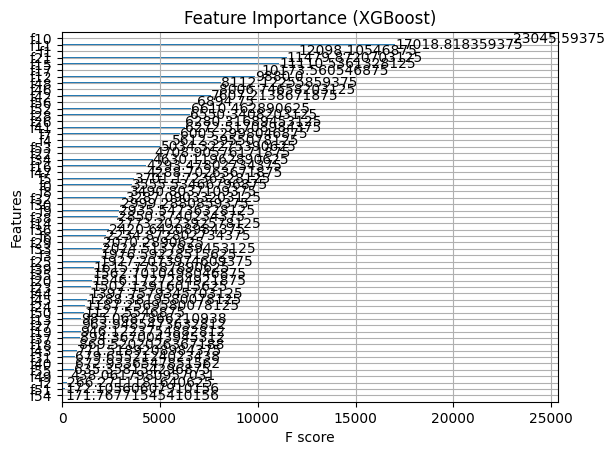

In [103]:
#feature Importance

xgb.plot_importance(xgb_clf, importance_type='gain')
plt.title('Feature Importance (XGBoost)')
plt.show()